# Lecture 16 - Gallery of Wigner functions

Author: J. R. Johansson (robert@riken.jp), https://jrjohansson.github.io/

This lecture series was developed by J.R. Johannson. The original lecture notebooks are available [here](https://github.com/jrjohansson/qutip-lectures).

This is a slightly modified version of the lectures, to work with the current release of QuTiP. You can find these lectures as a part of the [qutip-tutorials repository](https://github.com/qutip/qutip-tutorials). This lecture and other tutorial notebooks are indexed at the [QuTiP Tutorial webpage](https://qutip.org/tutorials.html).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from qutip import (about, basis, coherent, coherent_dm, displace, fock, ket2dm,
                   plot_wigner, squeeze, thermal_dm)

%matplotlib inline

## Introduction

## Parameters

In [2]:
N = 20

In [3]:
def plot_wigner_2d_3d(psi):
    xvec = np.linspace(-6, 6, 200)
    yvec = np.linspace(-6, 6, 200)

    fig = plt.figure(figsize=(17, 8))

    ax = fig.add_subplot(1, 2, 1)
    plot_wigner(psi, xvec=xvec, yvec=yvec, fig=fig, ax=ax)

    ax = fig.add_subplot(1, 2, 2, projection="3d")
    plot_wigner(psi, xvec=xvec, yvec=yvec, projection="3d", fig=fig, ax=ax)

    plt.close(fig)
    return fig

## Vacuum state: $\left|0\right>$

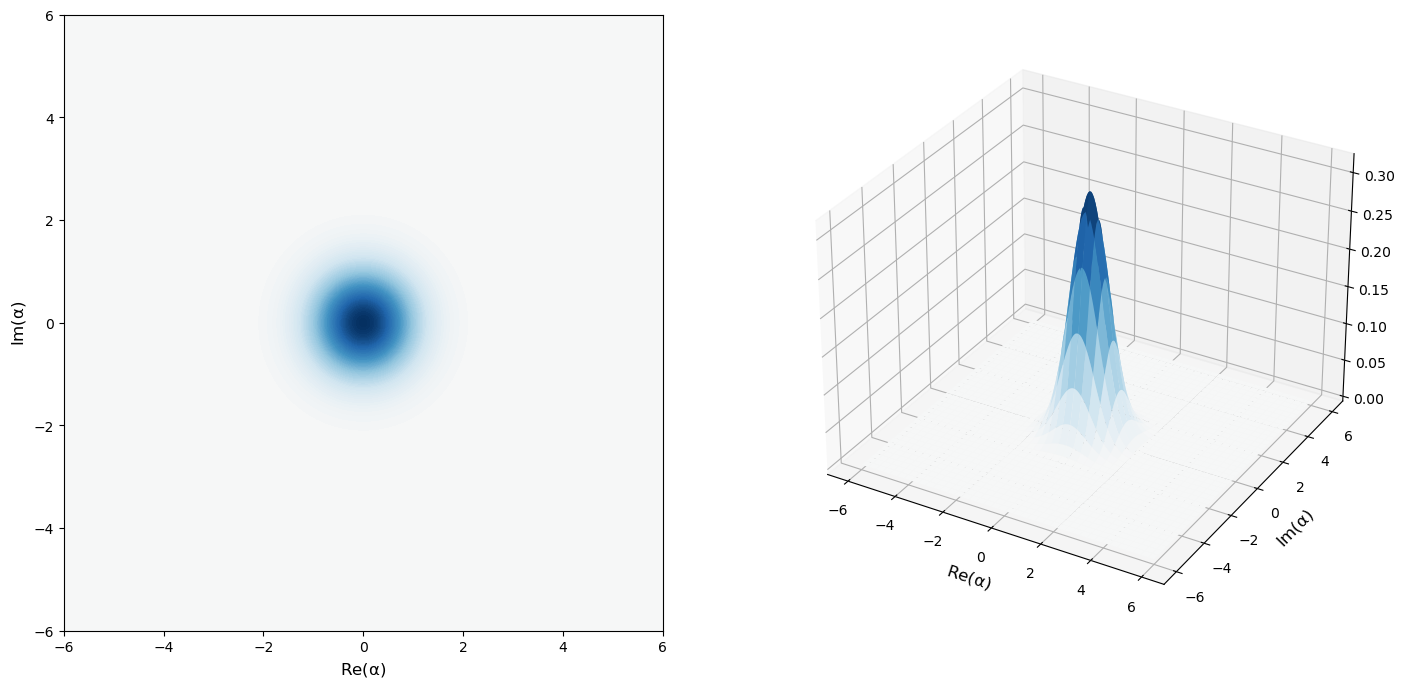

In [4]:
psi = basis(N, 0)
plot_wigner_2d_3d(psi)

## Thermal states

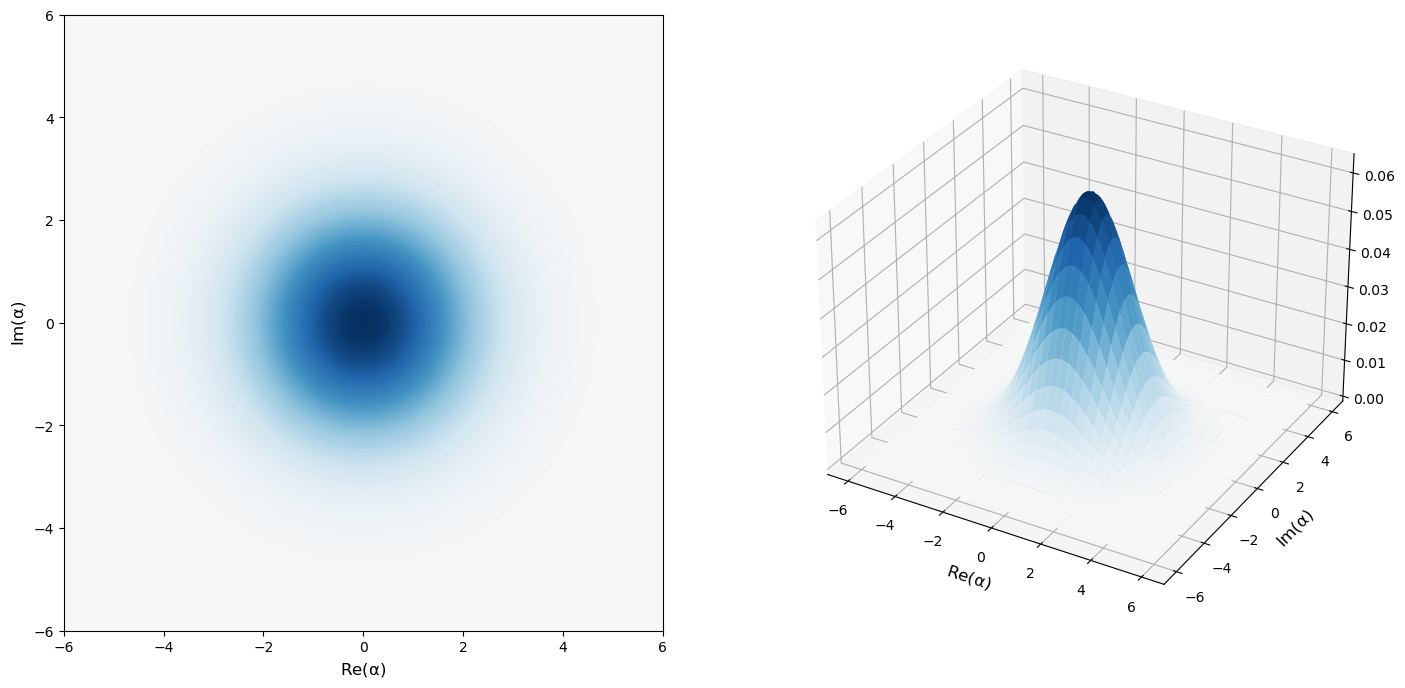

In [5]:
psi = thermal_dm(N, 2)
plot_wigner_2d_3d(psi)

## Coherent states: $\left|\alpha\right>$

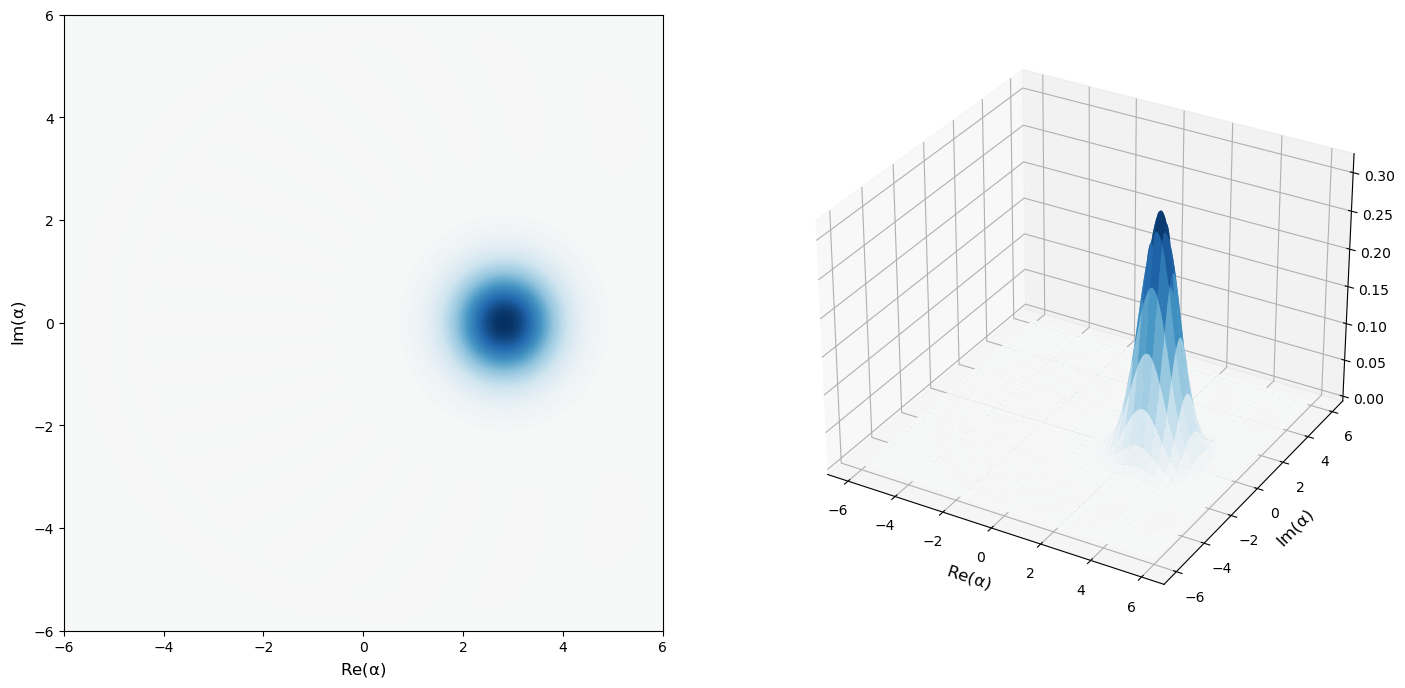

In [6]:
psi = coherent(N, 2.0)
plot_wigner_2d_3d(psi)

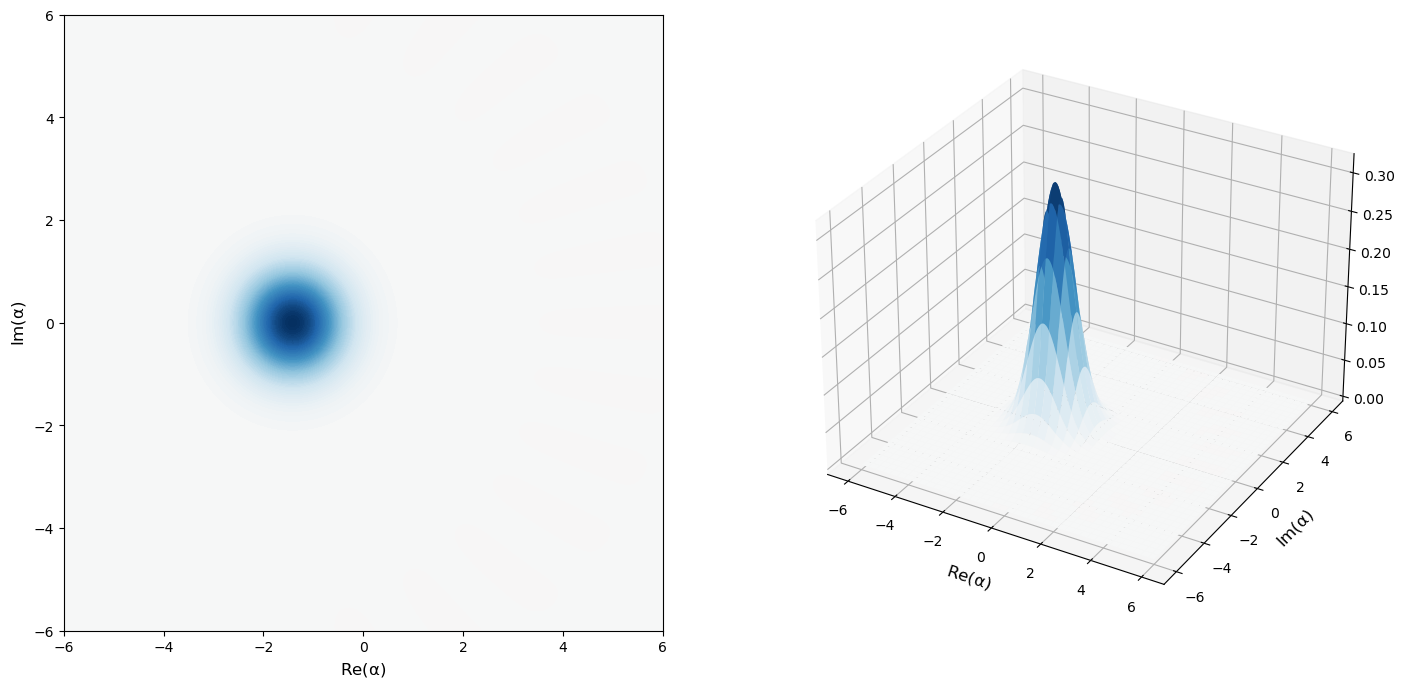

In [7]:
psi = coherent(N, -1.0)
plot_wigner_2d_3d(psi)

## Superposition of coherent states

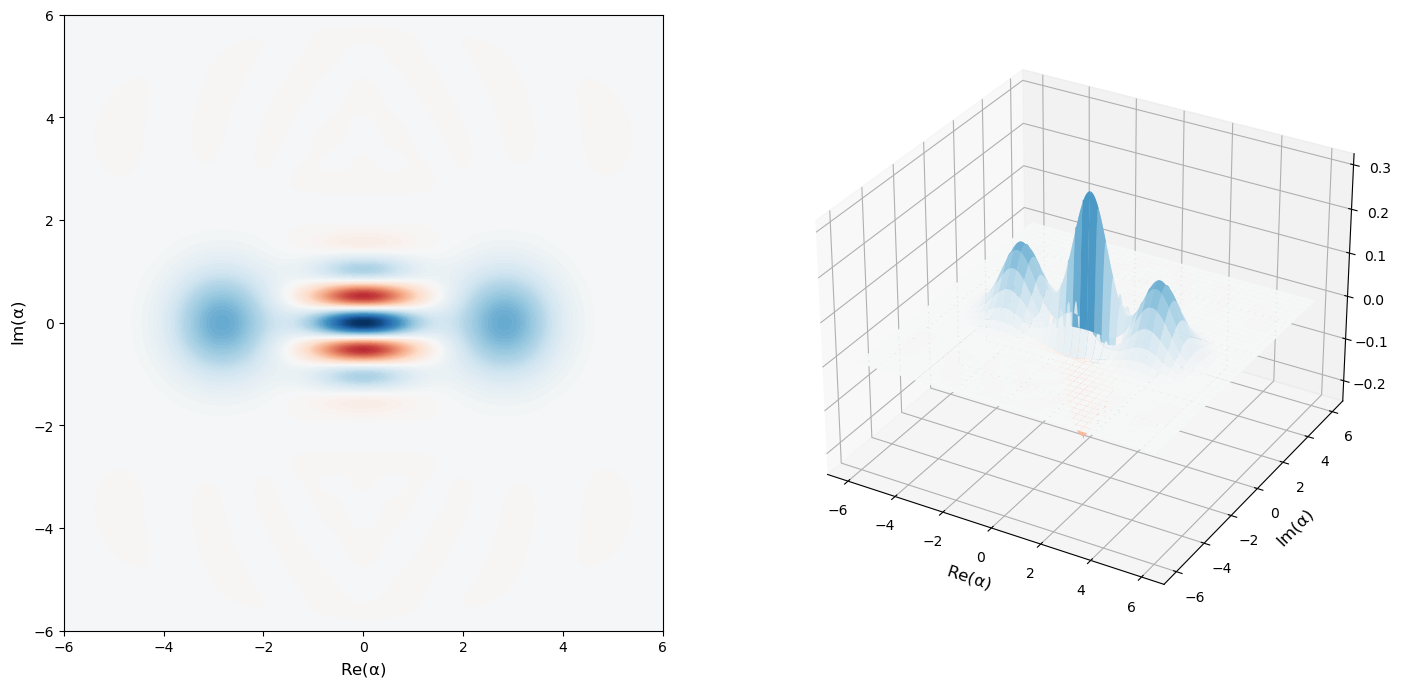

In [8]:
psi = (coherent(N, -2.0) + coherent(N, 2.0)) / np.sqrt(2)
plot_wigner_2d_3d(psi)

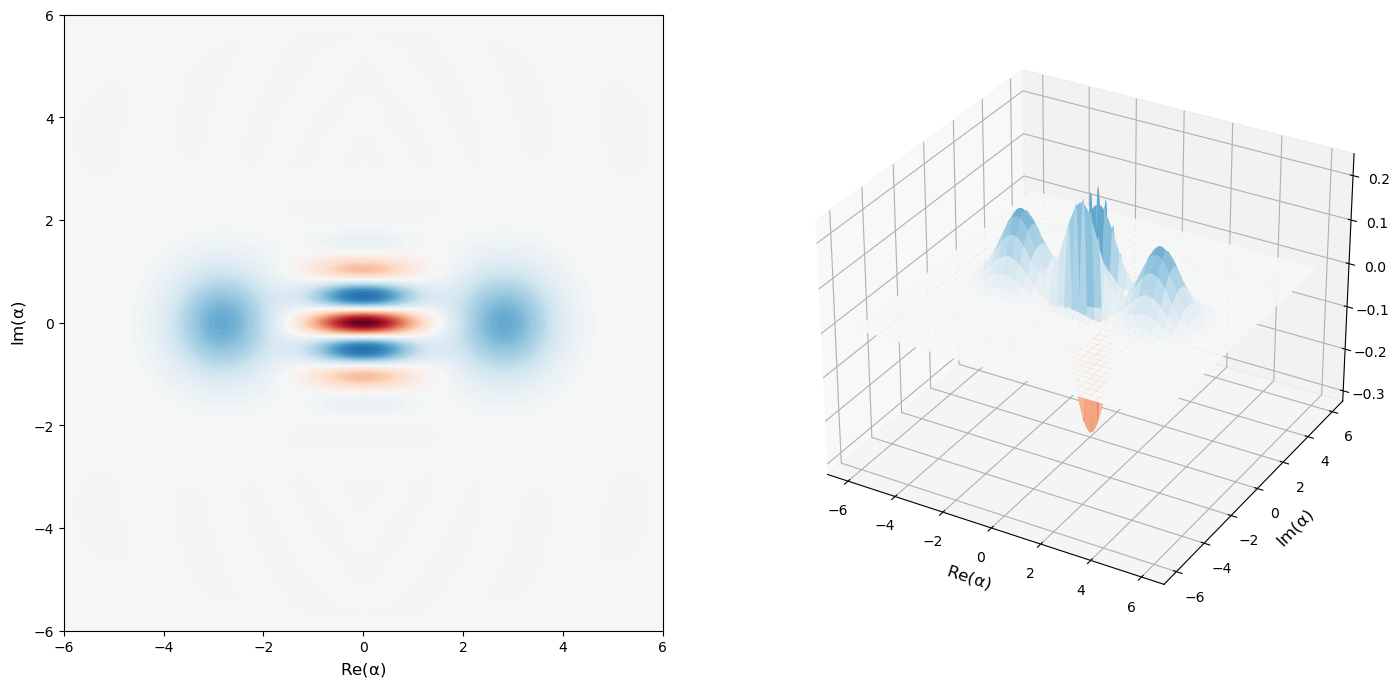

In [9]:
psi = (coherent(N, -2.0) - coherent(N, 2.0)) / np.sqrt(2)
plot_wigner_2d_3d(psi)

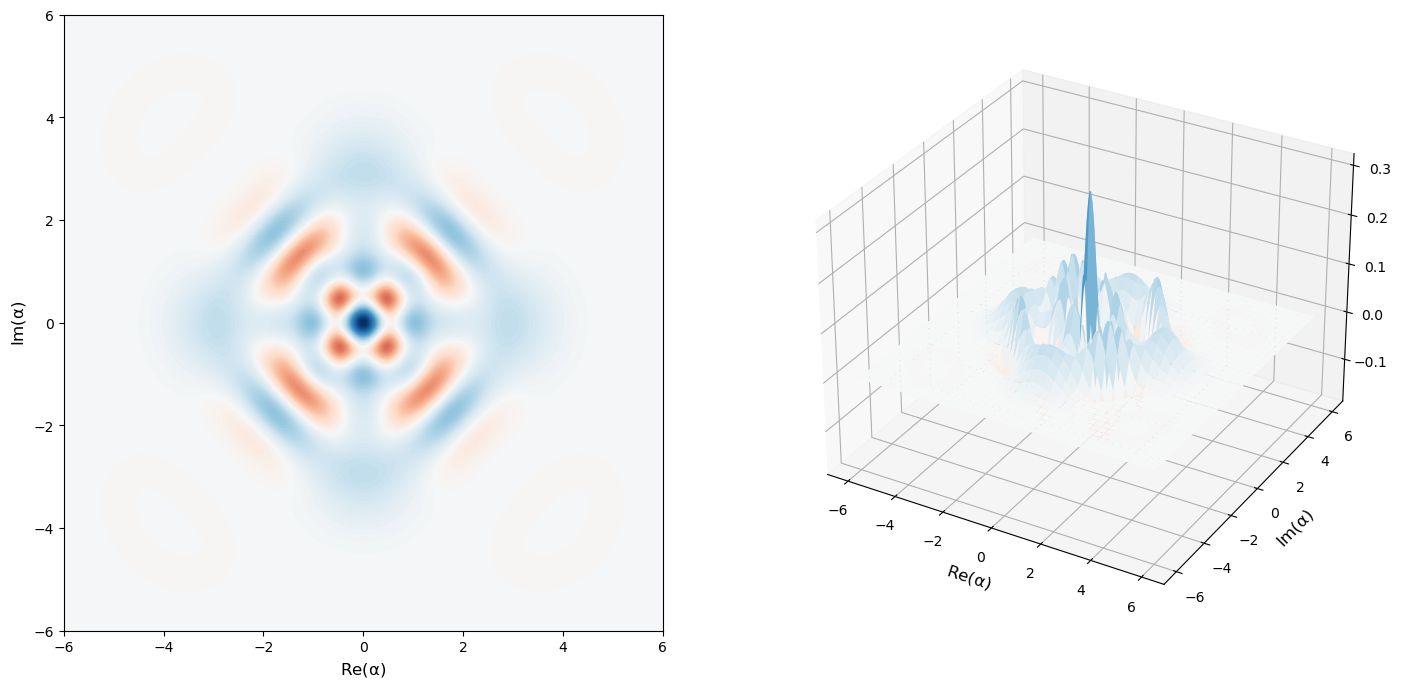

In [10]:
psi = (coherent(N, -2.0) + coherent(N, -2j) + coherent(N, 2j)
       + coherent(N, 2.0)).unit()
plot_wigner_2d_3d(psi)

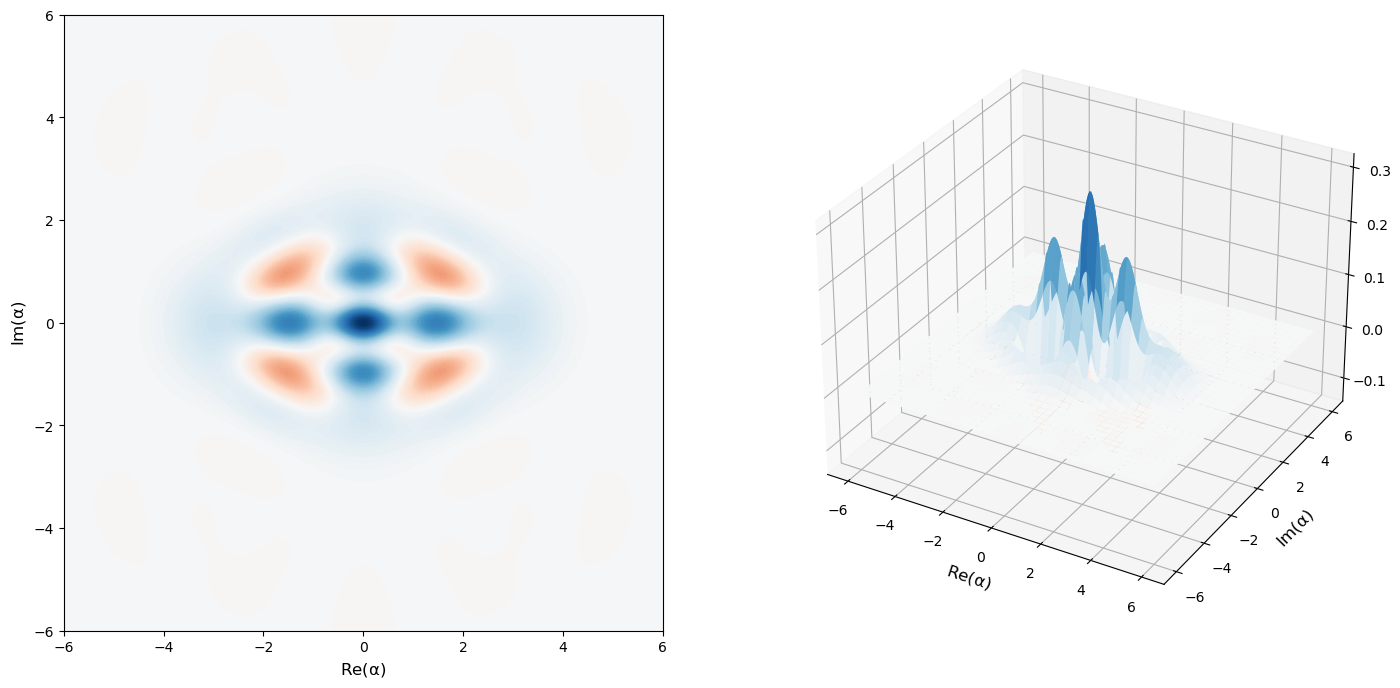

In [11]:
psi = (coherent(N, -2.0) + coherent(N, -1j) + coherent(N, 1j)
       + coherent(N, 2.0)).unit()
plot_wigner_2d_3d(psi)

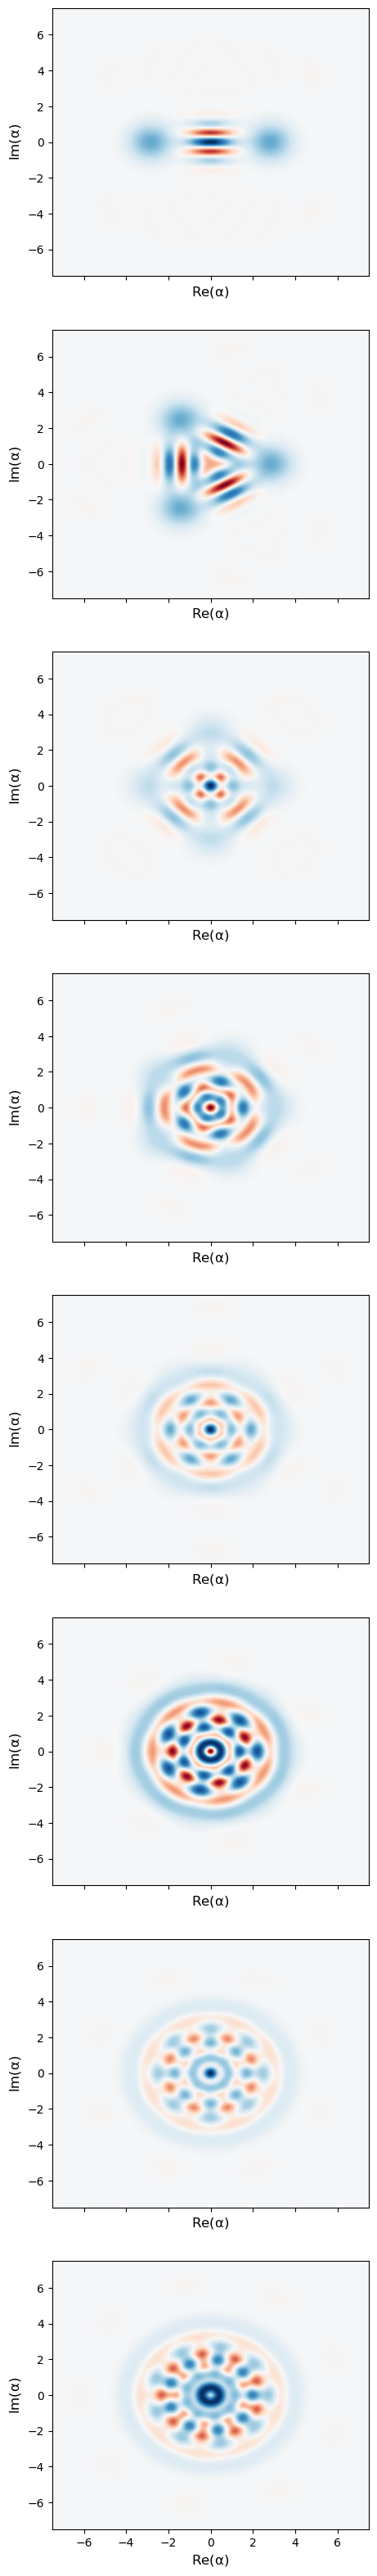

In [12]:
NN = 8

fig, axes = plt.subplots(NN, 1, figsize=(5, 5 * NN),
                         sharex=True, sharey=True)
for n in range(NN):
    psi = sum(
        [coherent(N, 2 * np.exp(2j * np.pi * m / (n + 2)))
         for m in range(n + 2)]
    ).unit()
    plot_wigner(psi, fig=fig, ax=axes[n])

    # if n < NN - 1:
    #    axes[n].set_ylabel("")

### Mixture of coherent states

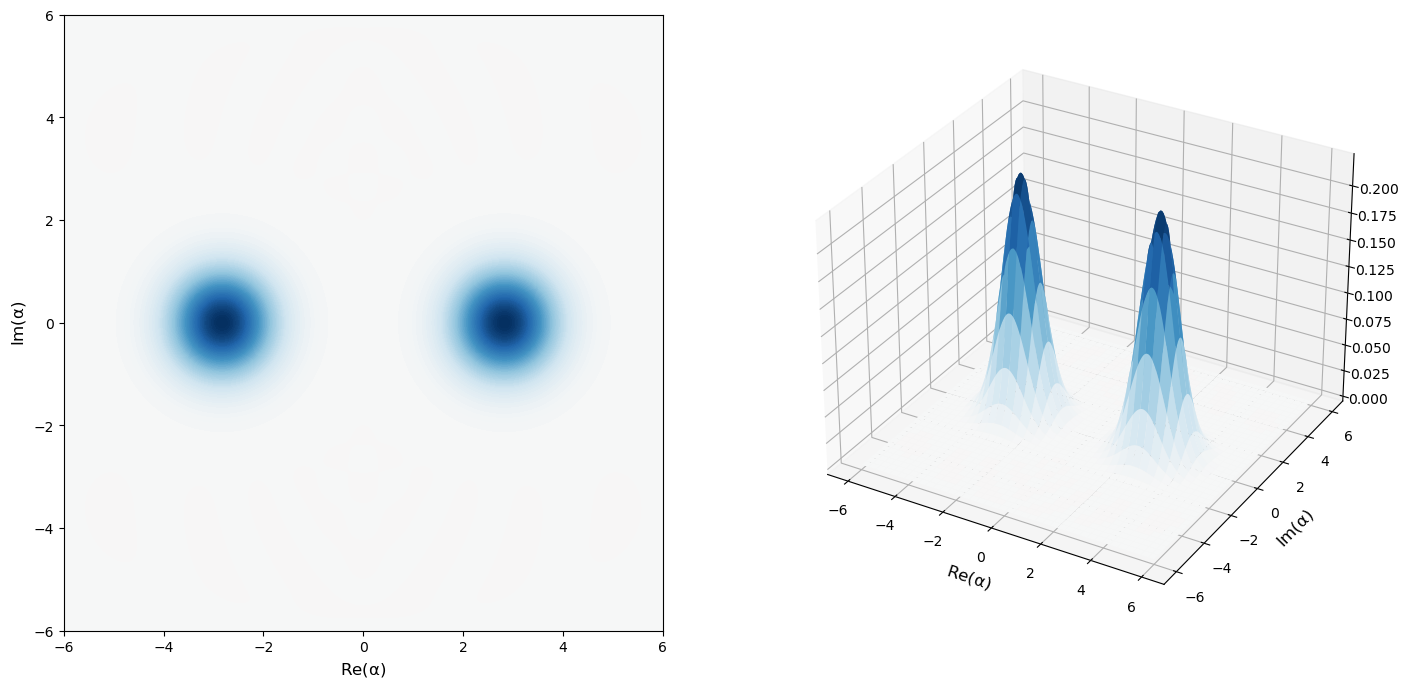

In [13]:
psi = (coherent_dm(N, -2.0) + coherent_dm(N, 2.0)) / np.sqrt(2)
plot_wigner_2d_3d(psi)

## Fock states: $\left|n\right>$

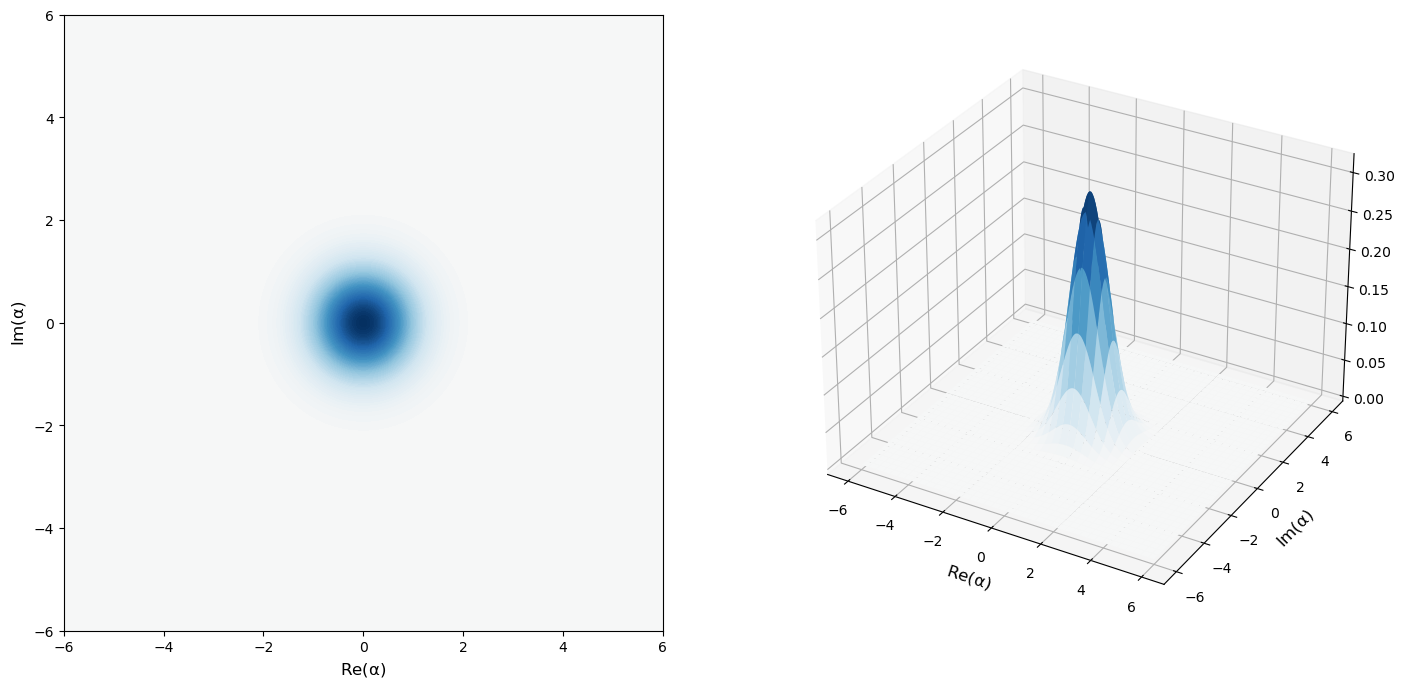

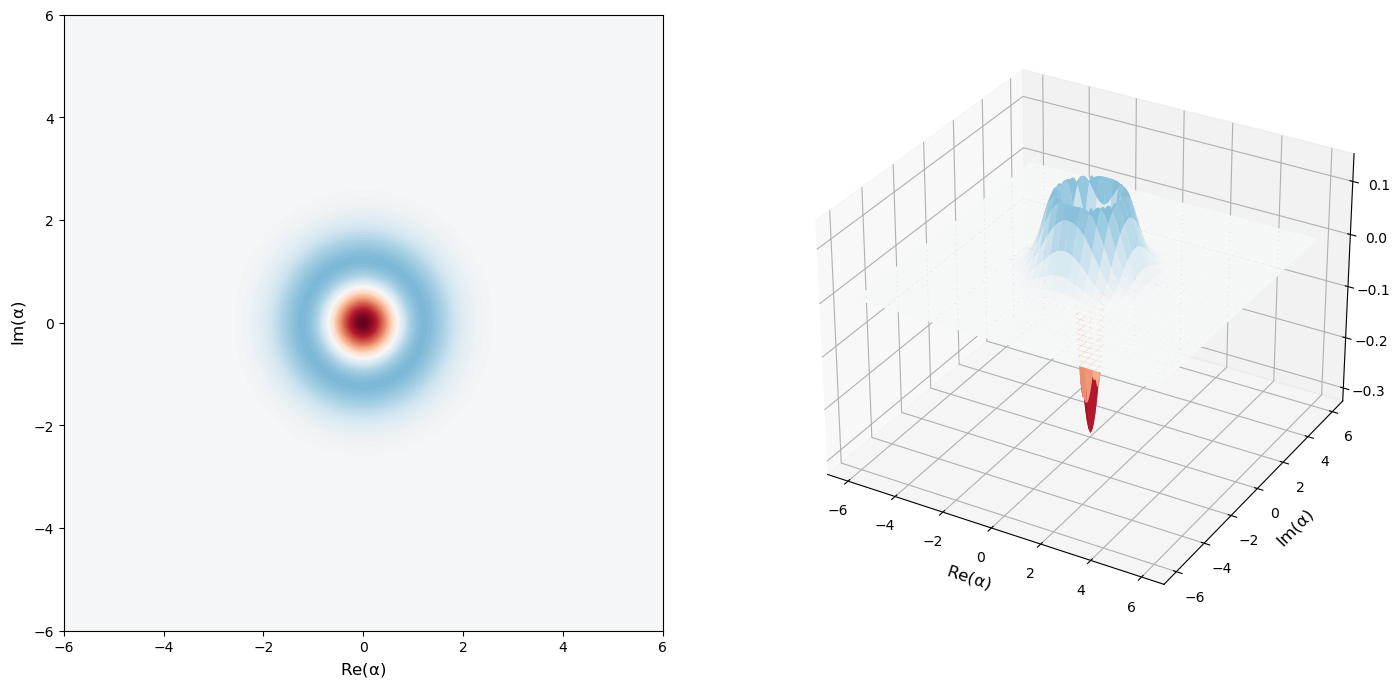

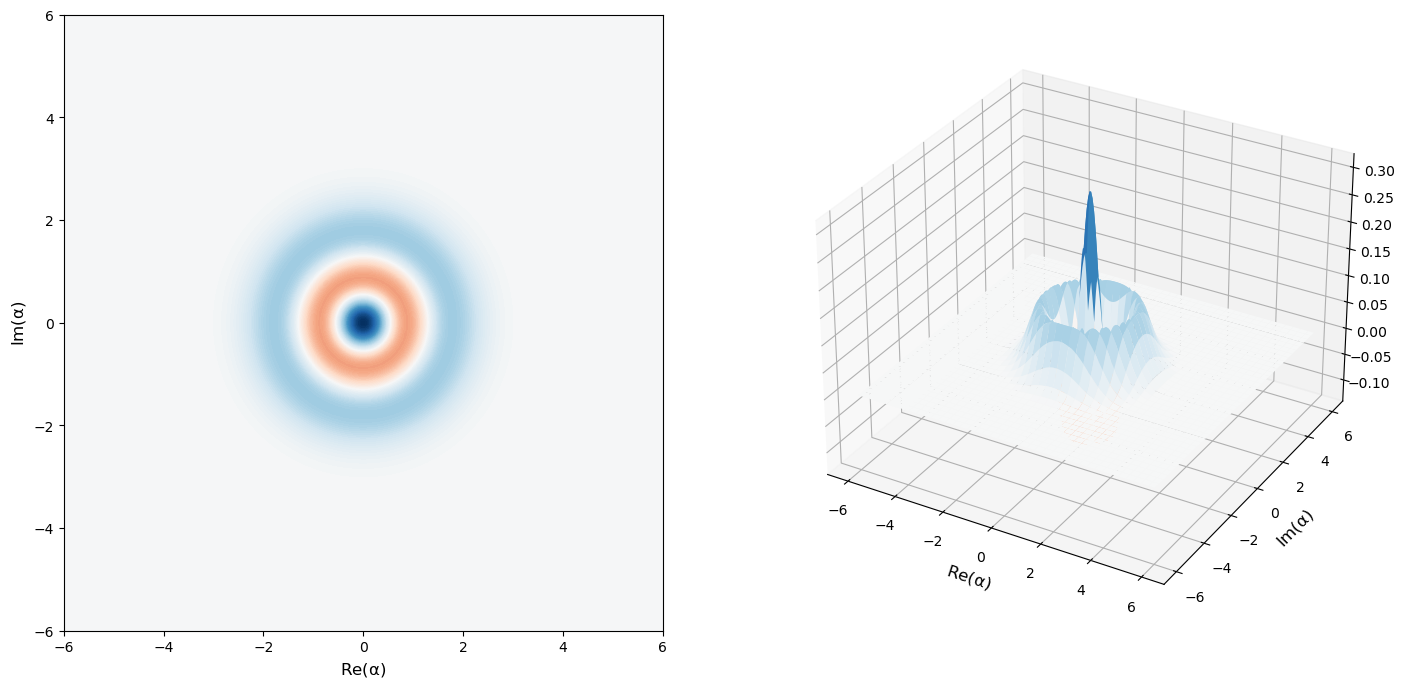

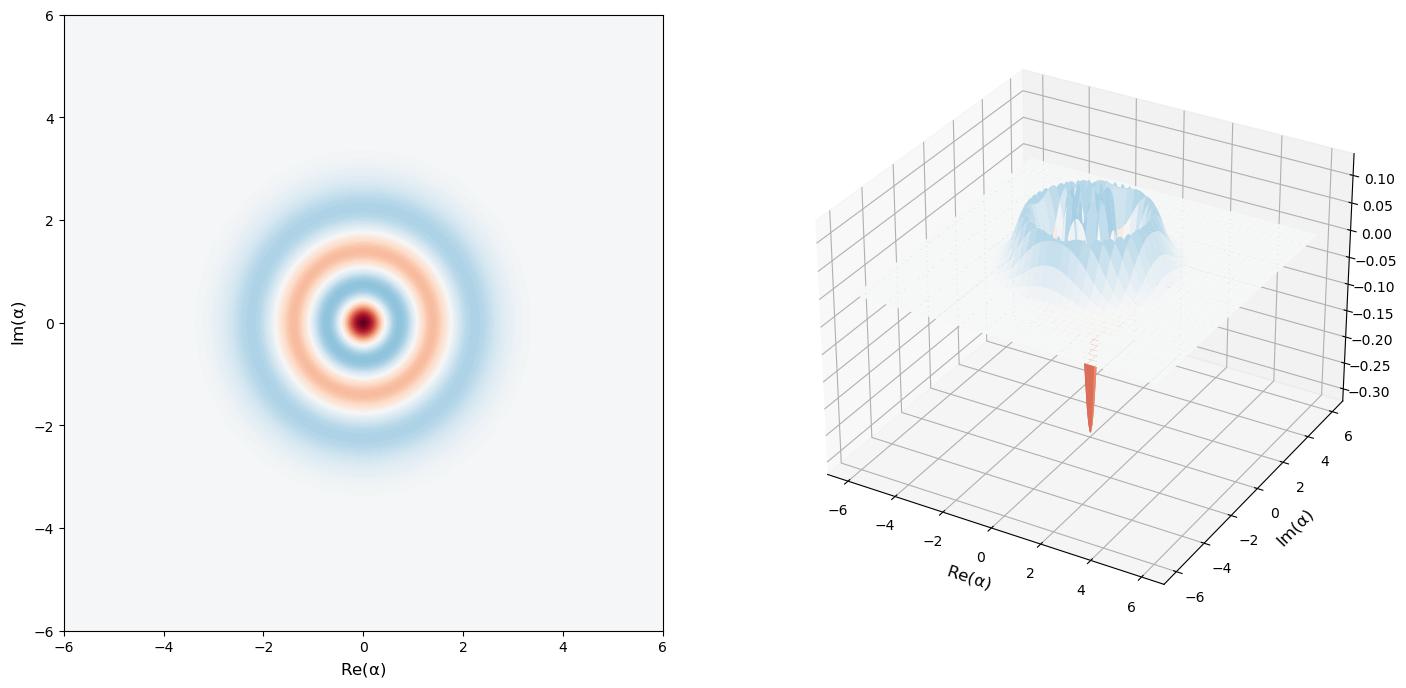

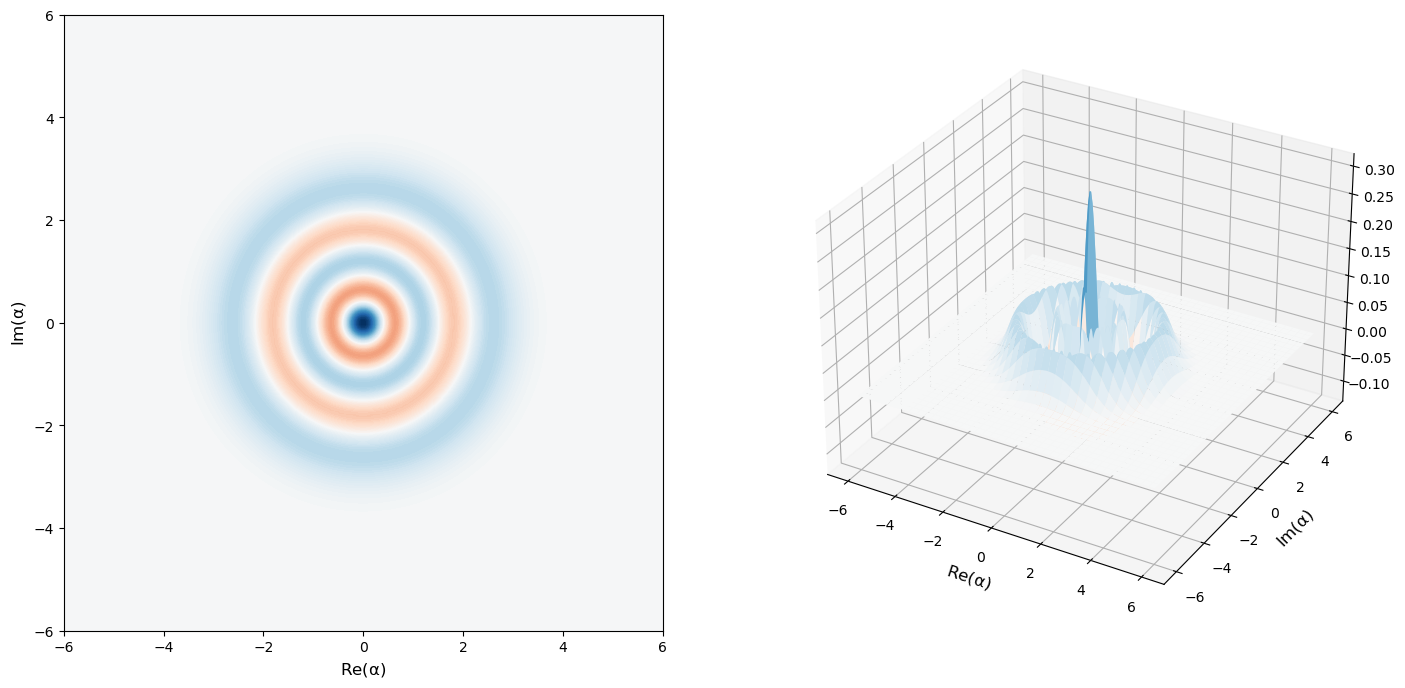

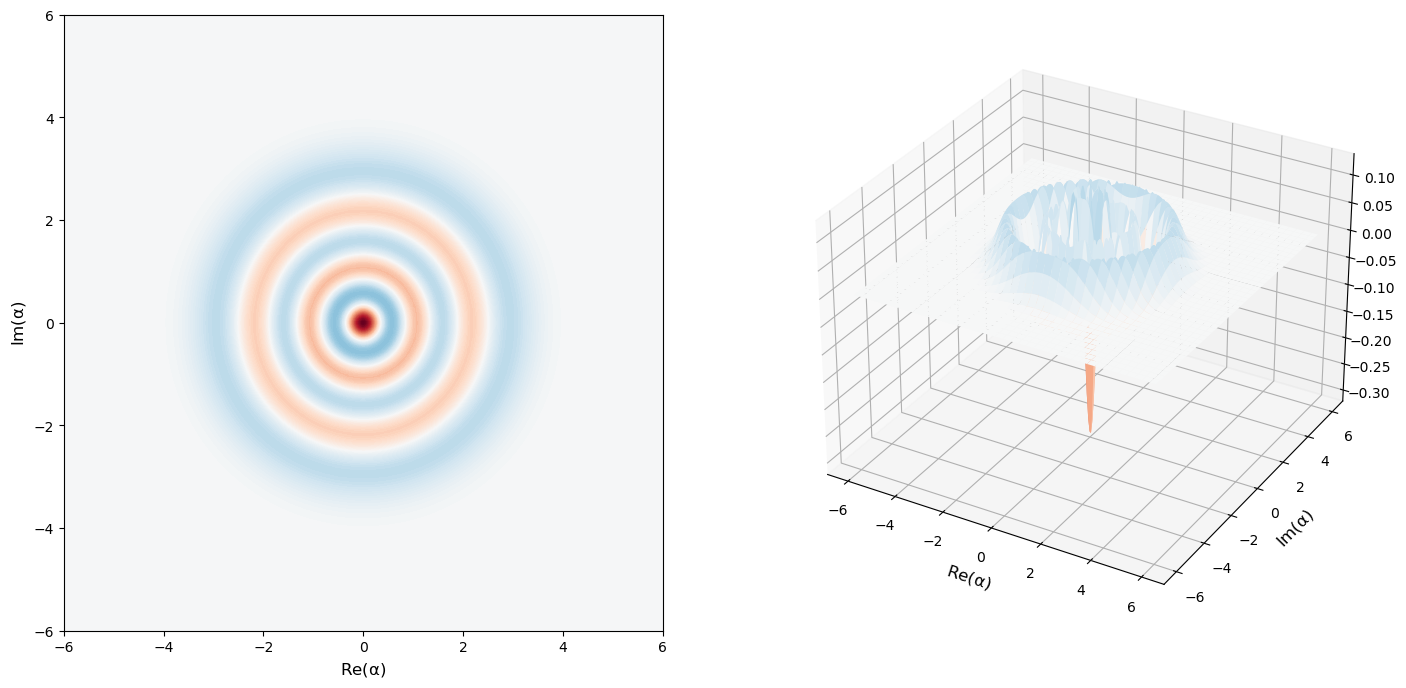

In [14]:
for n in range(6):
    psi = basis(N, n)
    display(plot_wigner_2d_3d(psi))

## Superposition of Fock states

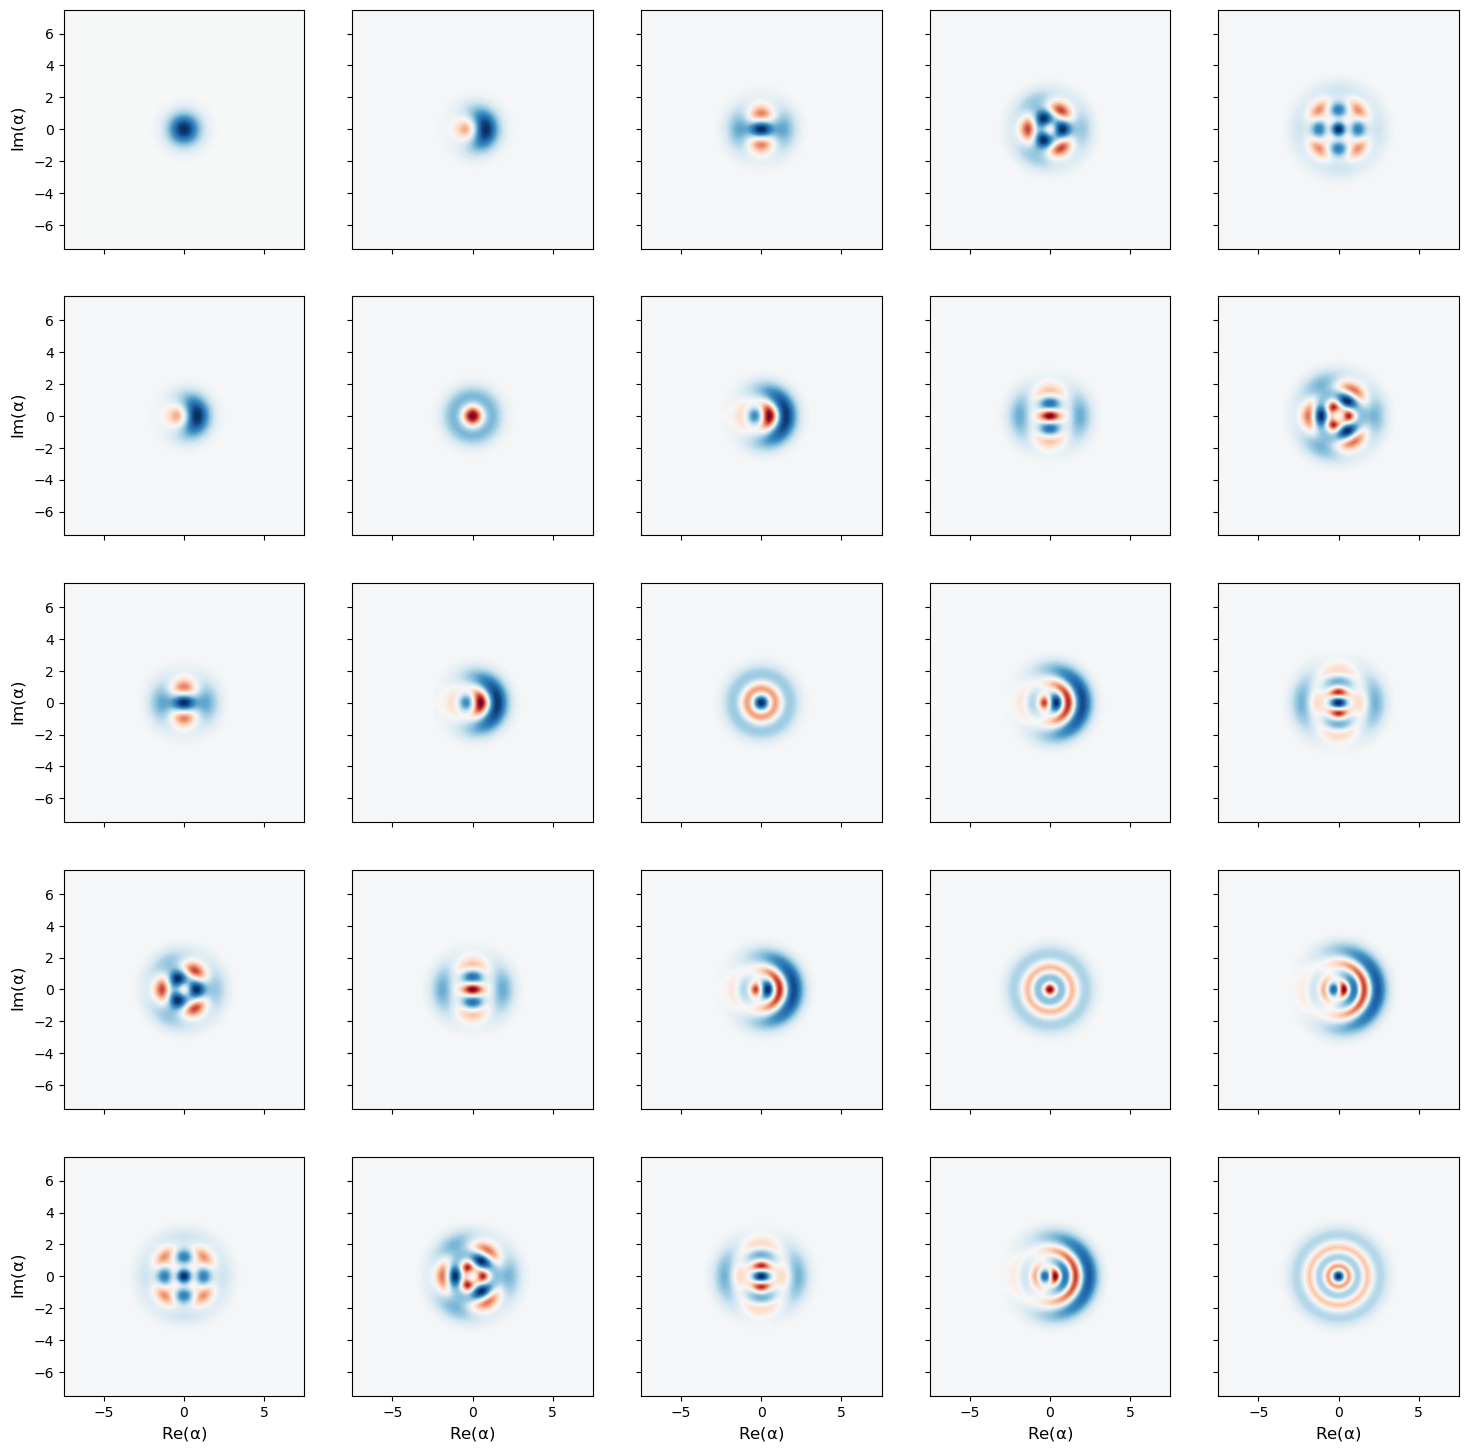

In [15]:
NN = MM = 5

fig, axes = plt.subplots(NN, MM, figsize=(18, 18),
                         sharex=True, sharey=True)
for n in range(NN):
    for m in range(MM):
        psi = (fock(N, n) + fock(N, m)).unit()
        plot_wigner(psi, fig=fig, ax=axes[n, m])
        if n < NN - 1:
            axes[n, m].set_xlabel("")
        if m > 0:
            axes[n, m].set_ylabel("")

## Squeezed vacuum states

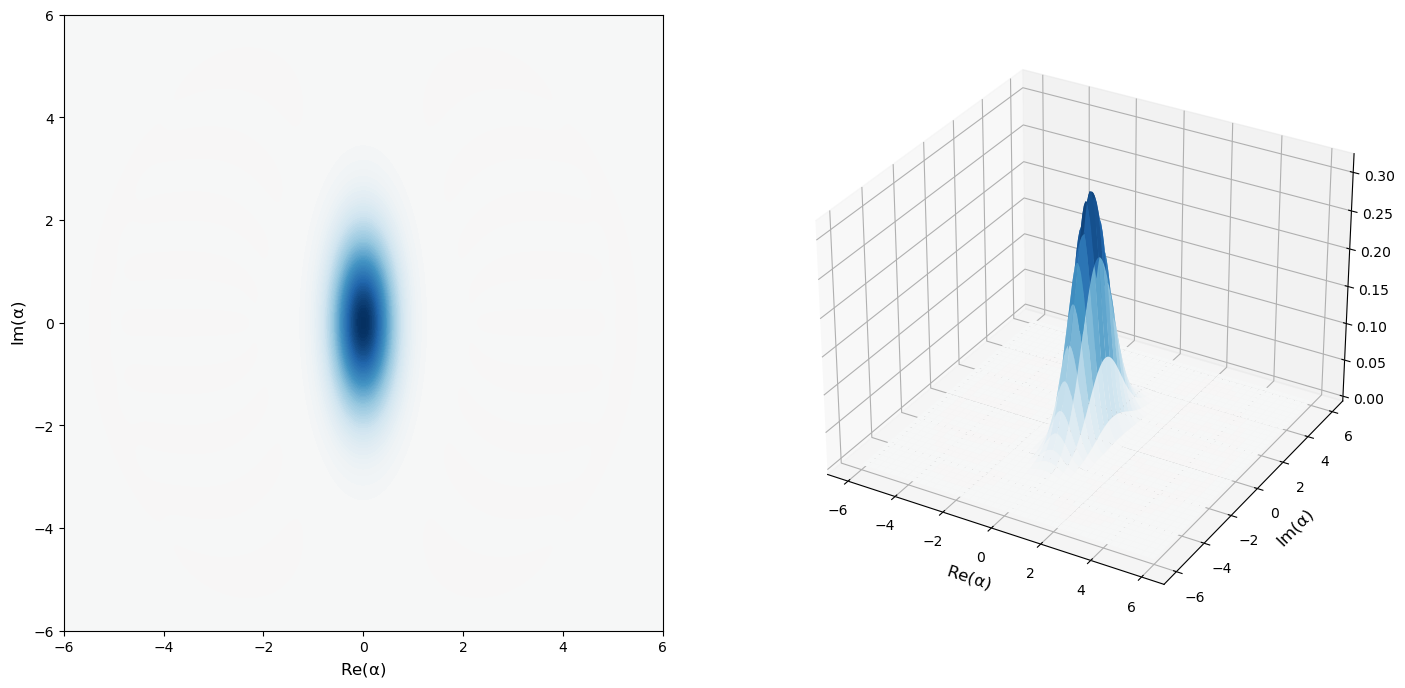

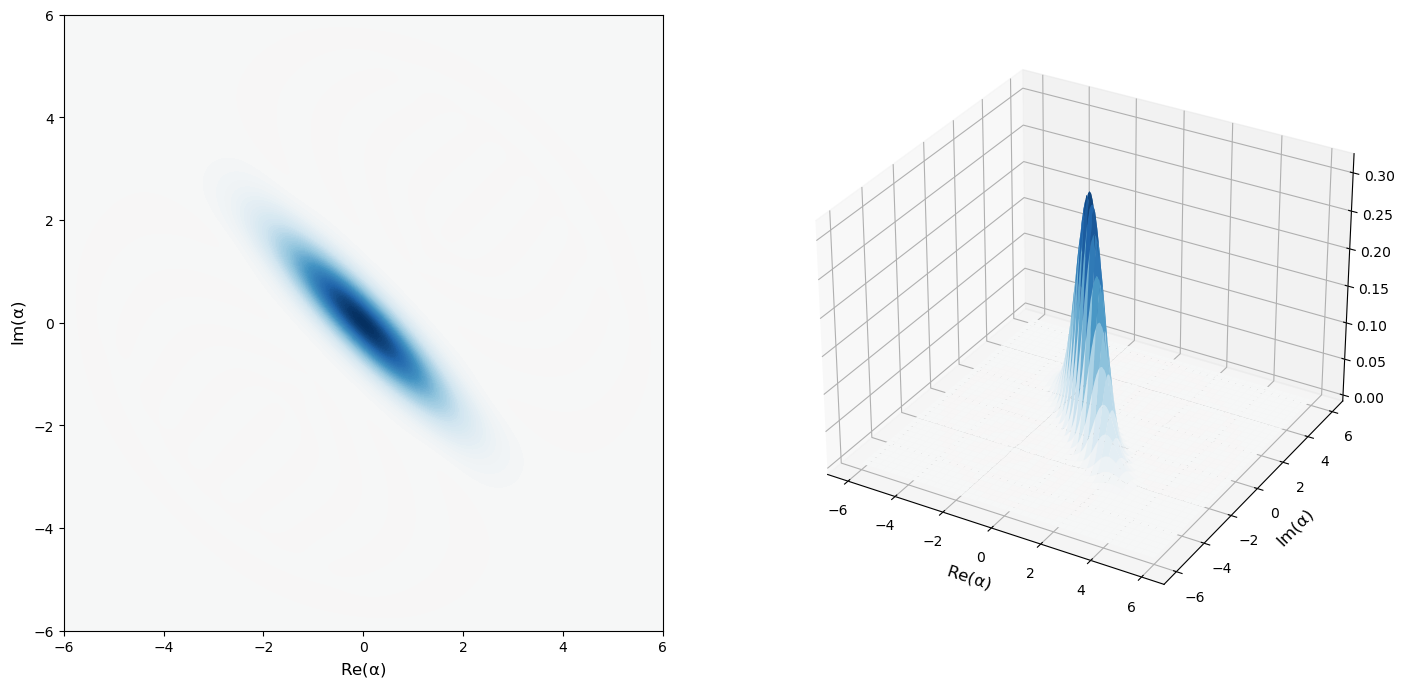

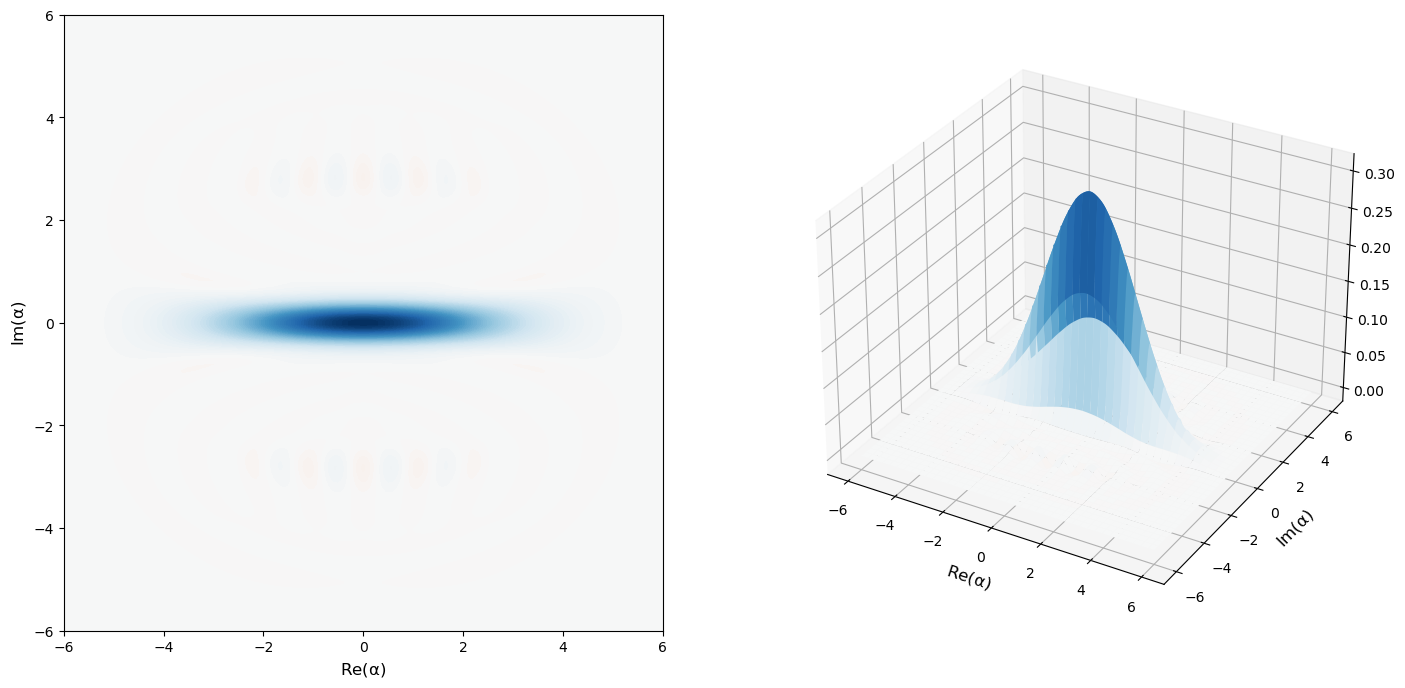

In [16]:
psi = squeeze(N, 0.5) * basis(N, 0)
display(plot_wigner_2d_3d(psi))

psi = squeeze(N, 0.75j) * basis(N, 0)
display(plot_wigner_2d_3d(psi))

psi = squeeze(N, -1) * basis(N, 0)
display(plot_wigner_2d_3d(psi))

### Superposition of squeezed vacuum

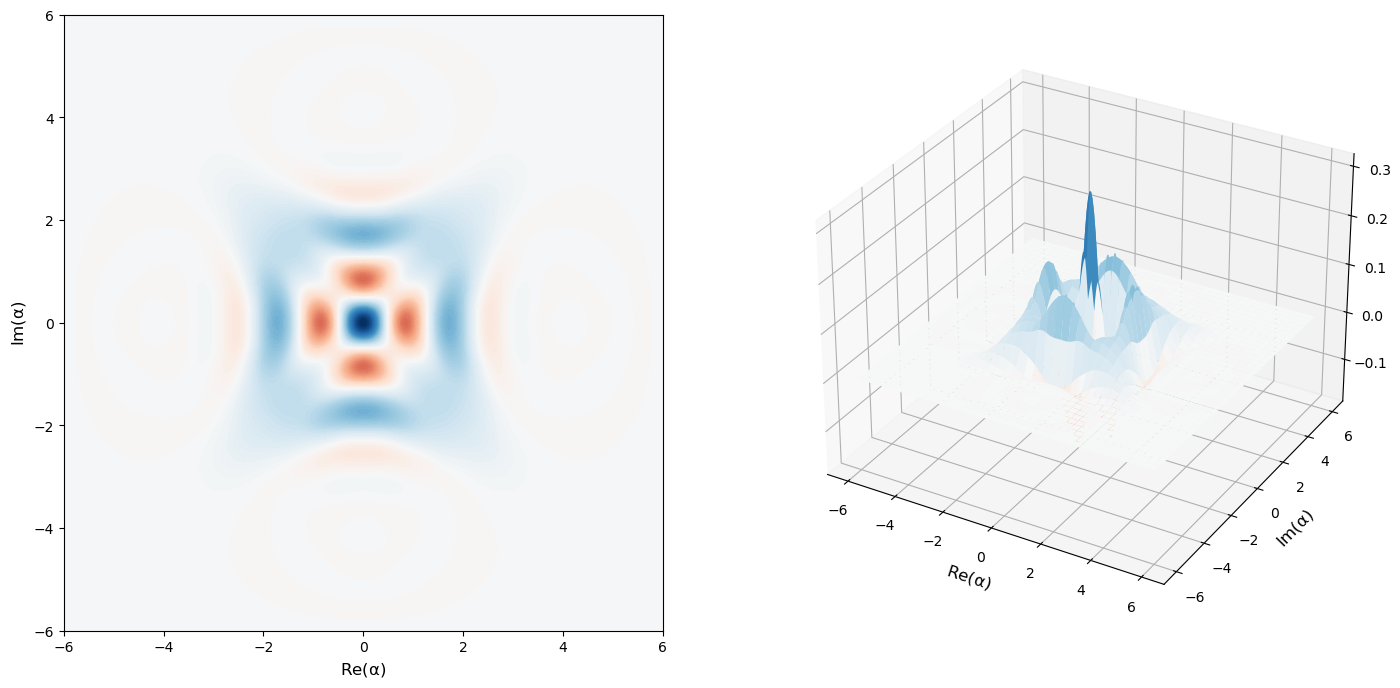

In [17]:
psi = (squeeze(N, 0.75j) * basis(N, 0) - squeeze(N, -0.75j)
       * basis(N, 0)).unit()
display(plot_wigner_2d_3d(psi))

### Mixture of squeezed vacuum

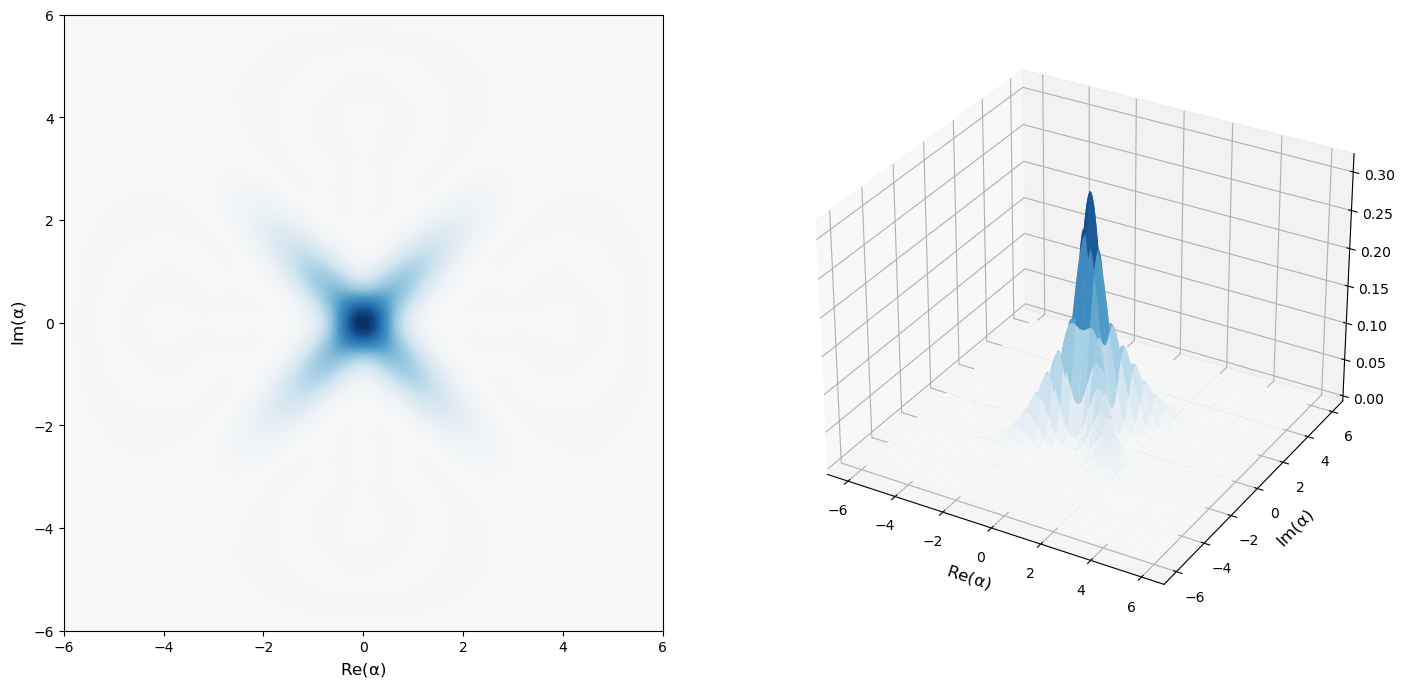

In [18]:
psi = (
    ket2dm(squeeze(N, 0.75j) * basis(N, 0)) +
    ket2dm(squeeze(N, -0.75j) * basis(N, 0))
).unit()
display(plot_wigner_2d_3d(psi))

## Displaced squeezed vacuum

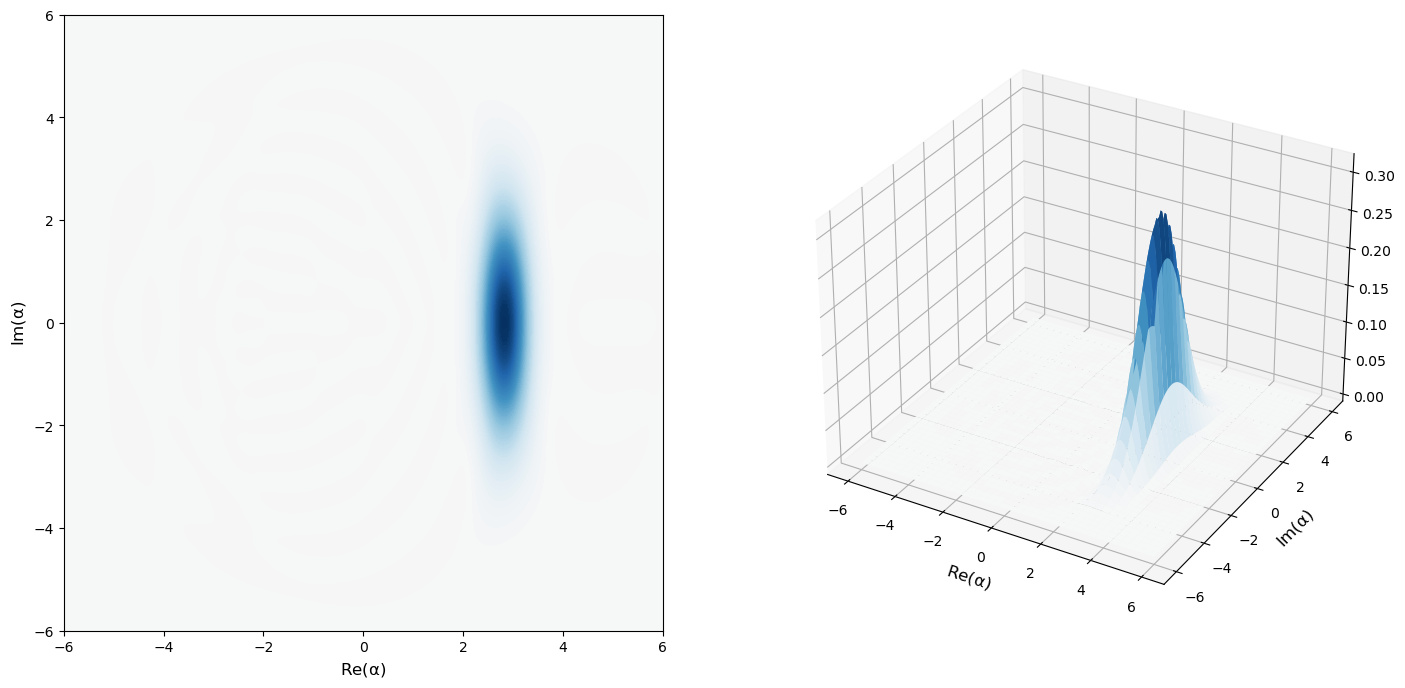

In [19]:
psi = displace(N, 2) * squeeze(N, 0.75) * basis(N, 0)
display(plot_wigner_2d_3d(psi))

### Superposition of two displaced squeezed states

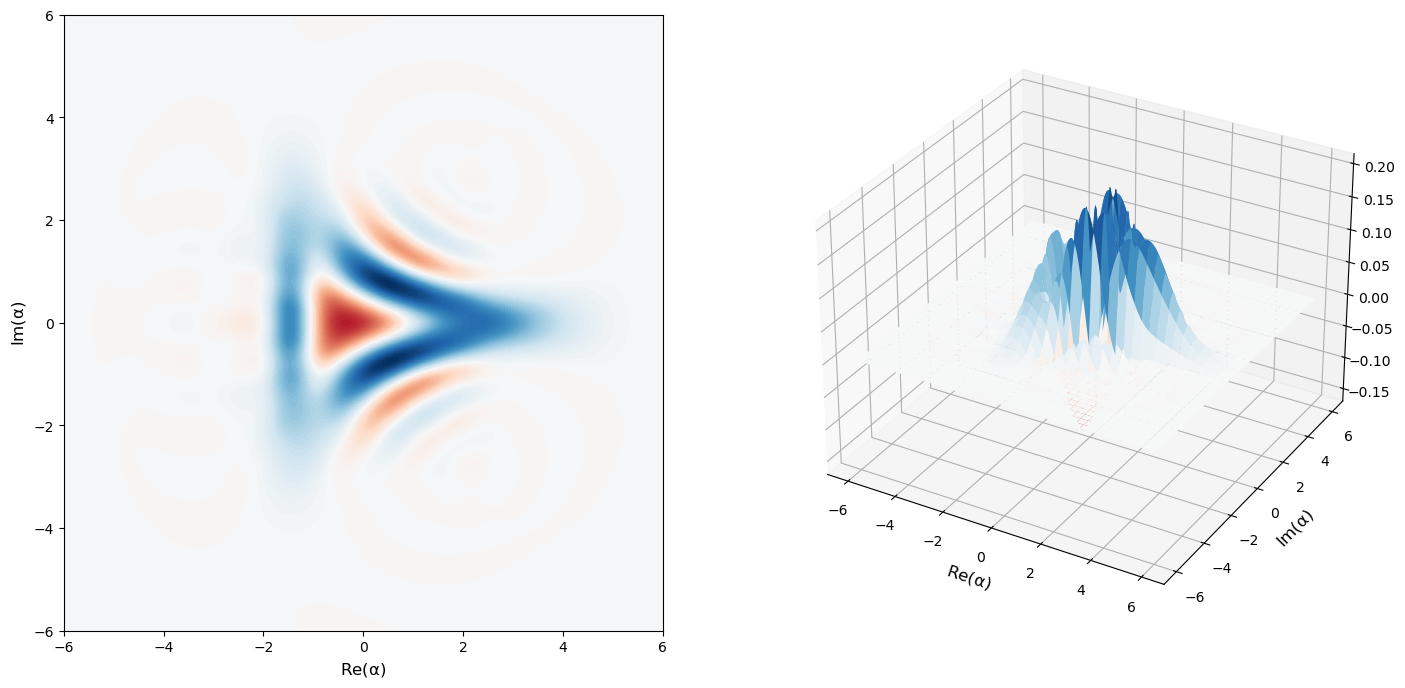

In [20]:
psi = (
    displace(N, -1) * squeeze(N, 0.75) * basis(N, 0)
    - displace(N, 1) * squeeze(N, -0.75) * basis(N, 0)
).unit()
display(plot_wigner_2d_3d(psi))

## Versions

In [21]:
about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Current admin team: Alexander Pitchford, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, Eric Giguère, Boxi Li, Jake Lishman, Simon Cross, Asier Galicia, Paul Menczel, and Patrick Hopf.
Board members: Daniel Burgarth, Robert Johansson, Anton F. Kockum, Franco Nori and Will Zeng.
Original developers: R. J. Johansson & P. D. Nation.
Previous lead developers: Chris Granade & A. Grimsmo.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      5.1.0.dev0+c874c4a
Numpy Version:      1.22.4
Scipy Version:      1.13.1
Cython Version:     3.0.10
Matplotlib Version: 3.5.2
Python Version:     3.10.4
Number of CPUs:     4
BLAS Info:          Generic
INTEL MKL Ext:      False
Platform Info:      Linux (x86_64)
Installation path:  /usr/share/miniconda3/envs/test-environment/lib/python3.10/site-packages/qutip
Please cite QuTiP in your publication.
For your convenience a bi